"""
=======================================
Receiver Operating Characteristic (ROC)
=======================================

Example of Receiver Operating Characteristic (ROC) metric to evaluate
classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false
positive rate on the X axis. This means that the top left corner of the plot is
the "ideal" point - a false positive rate of zero, and a true positive rate of
one. This is not very realistic, but it does mean that a larger area under the
curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize
the true positive rate while minimizing the false positive rate.

Multiclass settings
-------------------

ROC curves are typically used in binary classification to study the output of
a classifier. In order to extend ROC curve and ROC area to multi-class
or multi-label classification, it is necessary to binarize the output. One ROC
curve can be drawn per label, but one can also draw a ROC curve by considering
each element of the label indicator matrix as a binary prediction
(micro-averaging).

Another evaluation measure for multi-class classification is
macro-averaging, which gives equal weight to the classification of each
label.

.. note::

    See also :func:`sklearn.metrics.roc_auc_score`,
             :ref:`sphx_glr_auto_examples_model_selection_plot_roc_crossval.py`.

"""


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

Import some data to play with


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Binarize the output

In [4]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

Add noisy features to make the problem harder


In [5]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

shuffle and split training and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

Learn to predict each class against the other

In [8]:
 classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Compute ROC curve and ROC area for each class

In [9]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Compute micro-average ROC curve and ROC area

In [10]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot of a ROC curve for a specific class

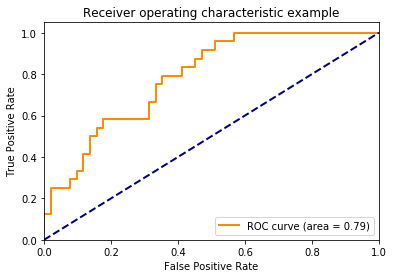

In [11]:
##############################################################################

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Plot ROC curves for the multiclass problem

Compute macro-average ROC curve and ROC area

Aggregate all false positive rates

In [1]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

NameError: name 'np' is not defined

Interpolate all ROC curves at this points

In [17]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

Average and compute AUC 

In [18]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

Plot all ROC curves

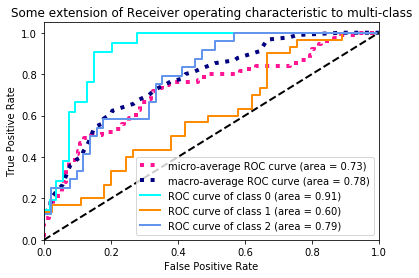

In [19]:
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()